CAR PRICE PREDICTION of used cars using a linear regression model .

Training accuracy of 77% and testing accuracy of 76%

In [887]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [888]:
data = pd.read_csv('carprice.csv')
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,S 350
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535
4342,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985,520
4343,Toyota,14200.00,sedan,31,NaN,Petrol,yes,2014,Corolla


In [889]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


As the number of unique models are very it does not contribute to the regression anlysis significantly.
Most of the vehicles are registered so the registration may not effect significantly in regression model

In [890]:
data_1 = data.drop(['Model'],axis=1)
data_1
data_1.describe(include='all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00


In [891]:
data_1.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [892]:
data_2 = data_1.dropna(axis=0)
data_2.isnull().sum()
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00


remove top 1% price cars as they are outliers


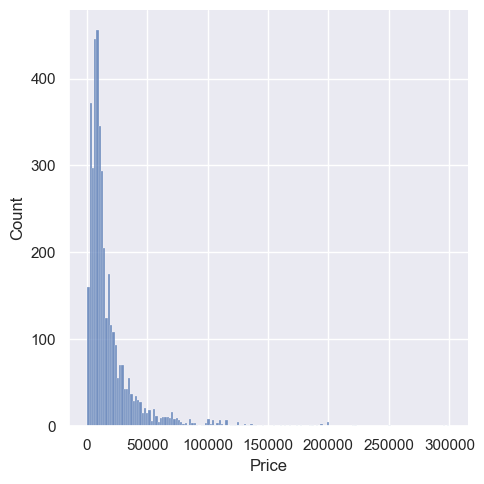

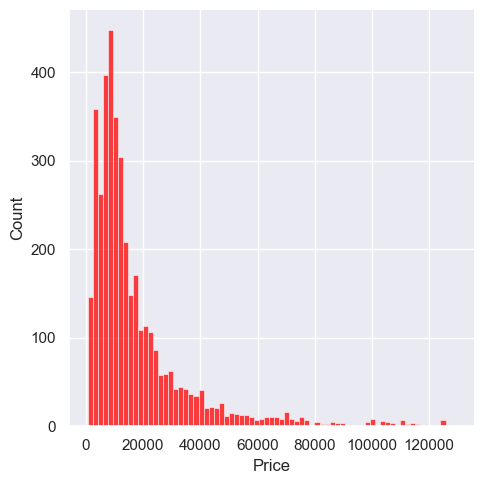

In [893]:
sns.displot(data_2['Price'])
threshold = data_2['Price'].quantile(0.99)
data_3 = data_2[data_2['Price']<threshold]
sns.displot(data_3['Price'],color='red')

In [894]:
data_4 = data_3[data_3['EngineV']<6.5]
data_4.describe(include='all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3961,3961.00,3961,3961.00,3961.00,3961,3961,3961.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,875,NaN,1516,NaN,NaN,1846,3596,NaN
mean,NaN,17890.55,NaN,164.94,2.44,NaN,NaN,2006.31
std,NaN,19009.52,NaN,102.85,0.94,NaN,NaN,6.67
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,93.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,160.00,2.20,NaN,NaN,2007.00
75%,NaN,21200.00,NaN,230.00,3.00,NaN,NaN,2011.00


C:\Users\SAKET\AppData\Local\Temp\ipykernel_18340\2079608332.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_5['Mileage'],color='red')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3956,3956.00,3956,3956.00,3956.00,3956,3956,3956.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,873,NaN,1516,NaN,NaN,1842,3591,NaN
mean,NaN,17875.34,NaN,164.16,2.44,NaN,NaN,2006.31
std,NaN,18996.50,NaN,100.48,0.94,NaN,NaN,6.67
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,93.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,159.00,2.20,NaN,NaN,2007.00
75%,NaN,21200.00,NaN,230.00,3.00,NaN,NaN,2011.00


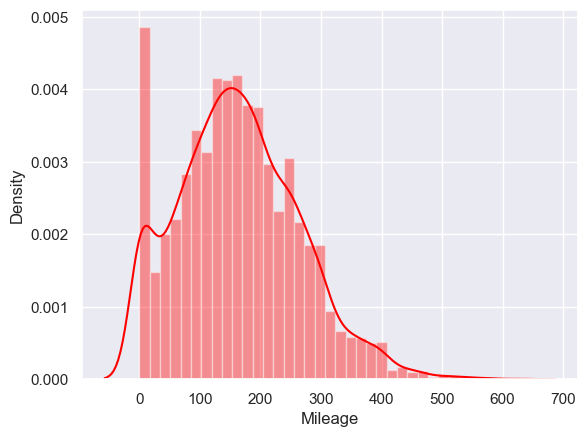

In [895]:
# sns.distplot(data_4['Mileage'])
data_5 = data_4[data_4['Mileage']<650 ]
sns.distplot(data_5['Mileage'],color='red')
data_5.describe(include='all')


In [905]:
# pd.Series(data_5['Year'].unique()).sort_values()
data_5 = data_5[data_5['Year']>data_5['Year'].quantile(0.1)]
data_5.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log-Price
count,982,982.00,982,982.00,982.00,982,982,982.00,982.00
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,crossover,NaN,NaN,Diesel,yes,NaN,NaN
freq,248,NaN,301,NaN,NaN,578,972,NaN,NaN
mean,NaN,35137.71,NaN,68.19,2.27,NaN,NaN,2013.54,10.18
std,NaN,27599.39,NaN,59.33,0.87,NaN,NaN,1.49,0.77
min,NaN,4000.00,NaN,0.00,0.65,NaN,NaN,2012.00,8.29
25%,NaN,13702.12,NaN,12.00,1.60,NaN,NaN,2012.00,9.53
50%,NaN,25500.00,NaN,58.50,2.00,NaN,NaN,2013.00,10.15
75%,NaN,47600.00,NaN,110.00,3.00,NaN,NaN,2015.00,10.77


C:\Users\SAKET\AppData\Local\Temp\ipykernel_18340\3656241065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_5['Log-Price'] = log_price


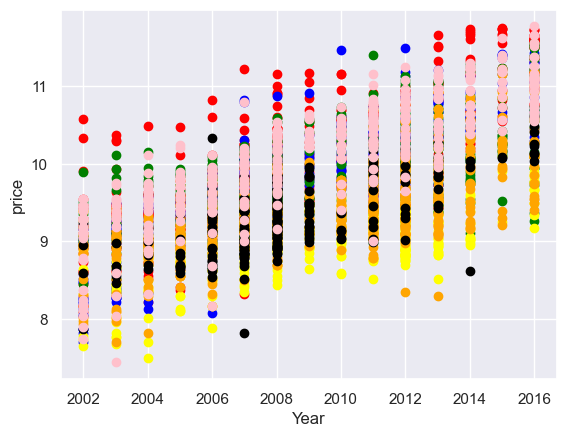

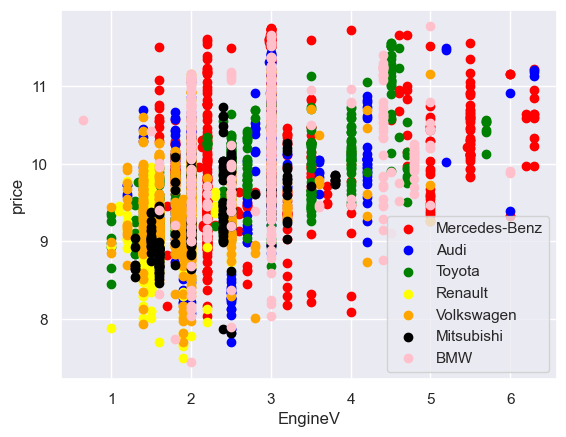

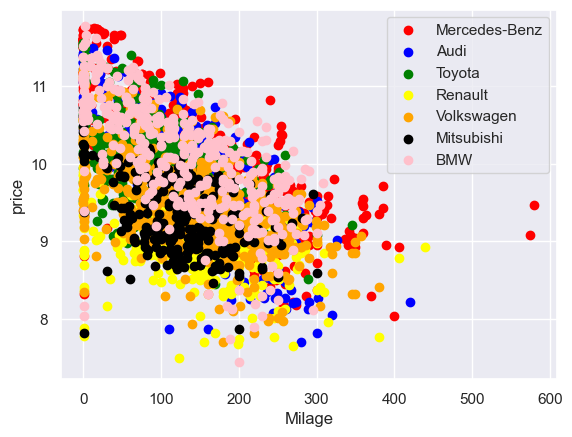

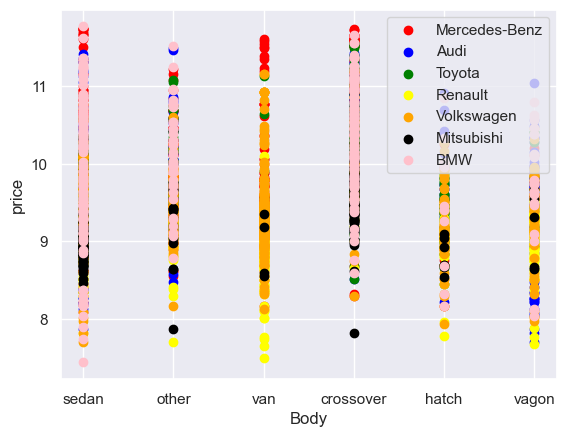

In [898]:
log_price = np.log(data_5['Price'])
data_5['Log-Price'] = log_price

categories = data_5['Brand'].unique()
colors = ['red', 'blue', 'green', 'yellow','orange','black','pink']

for i, Brand in enumerate(categories):
    plt.scatter(data_5[data_5['Brand'] == Brand]['Year'],
                data_5[data_5['Brand'] == Brand]['Log-Price'],
                c=colors[i],
                label=Brand)
# plt.scatter(data_5['Year'],data_5['Log-Price'])
plt.xlabel("Year")
plt.ylabel("price")
plt.show()


for i, Brand in enumerate(categories):
    plt.scatter(data_5[data_5['Brand'] == Brand]['EngineV'],
                data_5[data_5['Brand'] == Brand]['Log-Price'],
                c=colors[i],
                label=Brand)
    
# plt.scatter(data_5['EngineV'],data_5['Log-Price'])
plt.xlabel("EngineV")
plt.ylabel("price")
plt.legend()
plt.show()

for i, Brand in enumerate(categories):
    plt.scatter(data_5[data_5['Brand'] == Brand]['Mileage'],
                data_5[data_5['Brand'] == Brand]['Log-Price'],
                c=colors[i],
                label=Brand)
# plt.scatter(data_5['Mileage'],data_5['Log-Price'])
plt.xlabel("Milage")
plt.ylabel("price")
plt.legend()
plt.show()



VIF (variance inflation factor) is used to check the multicollinearity of the feature

VIF - [1,inf)

VIF = 1 : no multicollinearity
VIF <5 perfectly ok
VIF>5 multicollinearity

As year is to correlated with other we can remove it

In [825]:
data_5.describe(include='all')

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_5[['Mileage','Year',"EngineV"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif


,VIF,features
0,3.78,Mileage
1,10.13,Year
2,7.51,EngineV


In [826]:
data_5 = data_5.drop(['Year'],axis=1)
data_5

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Log-Price
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,9.81
7,Audi,14200.00,vagon,200,2.70,Diesel,yes,9.56
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.00,van,163,2.50,Diesel,yes,9.35
4339,Toyota,17900.00,sedan,35,1.60,Petrol,yes,9.79
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,11.74
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,8.78


If we have N categories for a feature we have to create N-1 dummies

As we dropped each feature while assigning dummy variables(Audi for brand) that implies audi coef_ is 0. The coef of brands which are positive are costlier than audi and negative indicate cheaper than audi


Dummies are compared with their respective becnch marks

In [872]:
data_with_dummies = pd.get_dummies(data_5,drop_first=True)
data_with_dummies


,Price,Mileage,EngineV,Log-Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
1,7900.00,427,2.90,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.00,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.00,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.00,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
7,14200.00,200,2.70,9.56,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,11500.00,163,2.50,9.35,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4339,17900.00,35,1.60,9.79,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4340,125000.00,9,3.00,11.74,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4341,6500.00,1,3.50,8.78,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [873]:
cols = ['Log-Price', 'Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol','Registration_yes']

data_preprocessed = data_with_dummies[cols]
data_preprocessed

,Log-Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
1,8.97,427,2.90,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.50,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.04,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.81,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
7,9.56,200,2.70,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,9.35,163,2.50,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4339,9.79,35,1.60,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4340,11.74,9,3.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4341,8.78,1,3.50,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [874]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_preprocessed[cols]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,44.53,Log-Price
1,4.55,Mileage
2,13.47,EngineV
3,2.58,Brand_BMW
4,3.17,Brand_Mercedes-Benz
5,1.88,Brand_Mitsubishi
6,2.40,Brand_Renault
7,2.54,Brand_Toyota
8,3.39,Brand_Volkswagen
9,1.55,Body_hatch


In [875]:
target = data_preprocessed['Log-Price']
inputs = data_preprocessed.drop(['Log-Price'],axis=1)

data_preprocessed.corr()

,Log-Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
Log-Price,1.00,-0.60,0.43,0.14,0.14,-0.08,-0.26,0.14,-0.11,-0.13,0.02,-0.08,-0.20,-0.18,-0.05,-0.04,0.08,0.49
Mileage,-0.60,1.00,0.01,0.03,0.12,-0.08,0.01,-0.18,0.02,-0.10,0.01,0.05,0.11,0.18,0.09,-0.00,-0.25,-0.28
EngineV,0.43,0.01,1.00,0.18,0.25,-0.06,-0.31,0.12,-0.26,-0.24,0.04,0.03,-0.15,-0.22,0.11,-0.03,0.08,0.03
Brand_BMW,0.14,0.03,0.18,1.00,-0.21,-0.12,-0.16,-0.17,-0.22,-0.07,-0.01,0.14,-0.05,-0.19,-0.05,-0.01,0.09,-0.10
Brand_Mercedes-Benz,0.14,0.12,0.25,-0.21,1.00,-0.14,-0.18,-0.19,-0.26,-0.08,0.10,0.04,-0.13,0.08,-0.05,-0.00,-0.07,0.01
Brand_Mitsubishi,-0.08,-0.08,-0.06,-0.12,-0.14,1.00,-0.11,-0.12,-0.15,-0.03,-0.03,0.02,-0.07,-0.12,0.20,-0.02,0.07,0.07
Brand_Renault,-0.26,0.01,-0.31,-0.16,-0.18,-0.11,1.00,-0.15,-0.19,0.02,-0.03,-0.18,0.19,0.27,-0.09,0.01,-0.16,0.04
Brand_Toyota,0.14,-0.18,0.12,-0.17,-0.19,-0.12,-0.15,1.00,-0.21,0.07,-0.04,0.02,-0.10,-0.16,0.21,0.02,0.12,0.11
Brand_Volkswagen,-0.11,0.02,-0.26,-0.22,-0.26,-0.15,-0.19,-0.21,1.00,0.10,0.00,-0.08,0.01,0.20,-0.10,-0.00,-0.05,0.02
Body_hatch,-0.13,-0.10,-0.24,-0.07,-0.08,-0.03,0.02,0.07,0.10,1.00,-0.09,-0.19,-0.08,-0.12,-0.04,0.05,0.16,-0.02


In [876]:

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(inputs)
inputs_scaled = scalar.transform(inputs)
inputs_scaled = inputs


In [877]:
train_x,test_x,train_y,test_y = train_test_split(inputs_scaled,target,test_size=0.2)

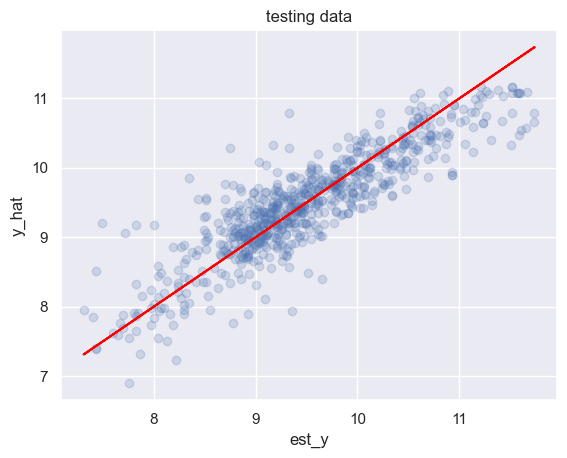

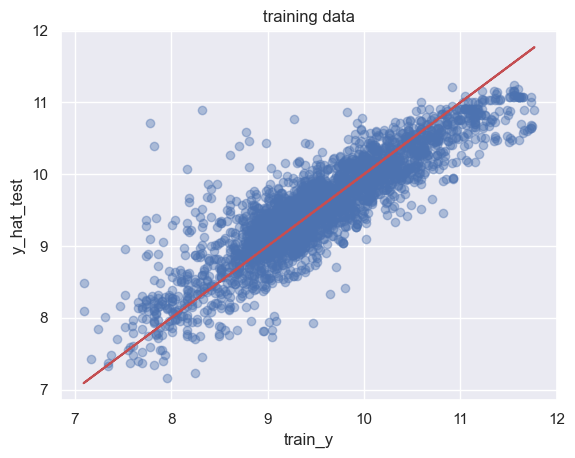

In [878]:
model = linear_model.LinearRegression()
model.fit(train_x,train_y)
y_hat = model.predict(train_x)

y_hat_test = model.predict(test_x)
    
plt.scatter(test_y,y_hat_test,alpha=0.2)
plt.plot(test_y,test_y,color="red")
plt.xlabel("est_y")
plt.ylabel("y_hat")
plt.title("testing data")
plt.show()

plt.xlabel("train_y")
plt.ylabel("y_hat_test")
plt.scatter(train_y,y_hat,alpha=0.4)
plt.title("training data")
plt.plot(train_y,train_y,'-r')
plt.show()



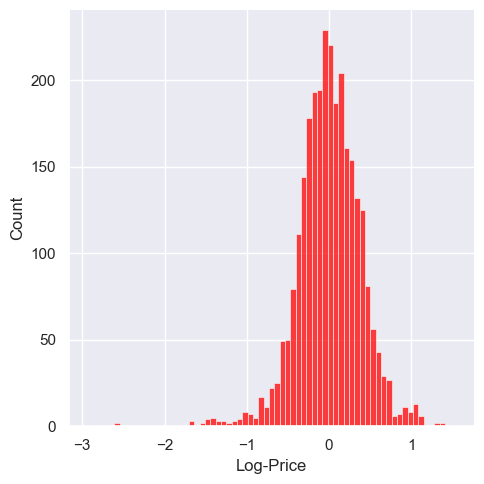

In [879]:
sns.displot(train_y - y_hat,color='red')

In [880]:
print(model.score(train_x,train_y))
model_summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
model_summary['Weights'] = model.coef_
model_summary

0.7724535239997996


,Features,Weights
0,Mileage,-0.00
1,EngineV,0.21
2,Brand_BMW,0.08
3,Brand_Mercedes-Benz,0.04
4,Brand_Mitsubishi,-0.54
5,Brand_Renault,-0.60
6,Brand_Toyota,-0.19
7,Brand_Volkswagen,-0.21
8,Body_hatch,-0.54
9,Body_other,-0.33


As we dropped each feature while assigning dummy variables(Audi for brand) that implies audi coef_ is 0. The coef of brands which are positive are costlier than audi and negative indicate cheaper than audi


Dummies are compared with their respective becnch marks

In [881]:
df_performance = pd.DataFrame(np.exp(y_hat_test),columns=['predictions'])
df_performance.head()


,predictions
0,30847.64
1,7094.32
2,12046.42
3,39767.42
4,11169.92


In [882]:
df_performance['test'] = np.exp(test_y.reset_index(drop=True))
df_performance.head()

,predictions,test
0,30847.64,34500.00
1,7094.32,3900.00
2,12046.42,12100.00
3,39767.42,37500.00
4,11169.92,18700.00


In [883]:
df_performance['residual'] = df_performance['test'] - df_performance['predictions']
df_performance['Difference'] = np.absolute(df_performance['residual']/df_performance['test']*100)
df_performance
df_performance.describe()

,predictions,test,residual,Difference
count,709.00,709.00,709.00,709.00
mean,17321.67,19475.43,2153.76,32.01
std,13646.35,20271.98,11221.19,41.94
min,992.93,1500.00,-37425.19,0.06
25%,8348.48,7900.00,-2450.11,10.73
50%,12859.93,11950.00,92.83,22.88
75%,21277.14,22600.00,3349.46,39.67
max,70321.74,125000.00,82627.52,454.59


In [884]:
pd.options.display.max_rows = 100
pd.set_option('display.float_format', '{:.2f}'.format)
df_performance.sort_values(by='Difference')

,predictions,test,residual,Difference
218,15891.06,15900.00,8.94,0.06
54,12884.35,12900.00,15.65,0.12
619,7589.63,7600.00,10.37,0.14
549,6787.96,6800.00,12.04,0.18
661,20959.45,21000.00,40.55,0.19
...,...,...,...,...
40,9651.58,2500.00,-7151.58,286.06
293,48625.19,11200.00,-37425.19,334.15
104,19130.02,4200.00,-14930.02,355.48
224,29139.00,6300.00,-22839.00,362.52


In [885]:
print(model.score(train_x,train_y))
print(model.score(test_x,test_y))


0.7724535239997996
0.7735437018210164
